# Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# import the dataset

In [3]:
with open('./traffic-signs-data/train.p', mode = 'rb') as training_data:
    train = pickle.load(training_data)
with open('./traffic-signs-data/valid.p', mode = 'rb') as validation_data:
    valid = pickle.load(validation_data)
with open('./traffic-signs-data/test.p', mode = 'rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

In [7]:
X_validation.shape

(4410, 32, 32, 3)

In [8]:
y_validation.shape

(4410,)

In [9]:
X_test.shape

(12630, 32, 32, 3)

In [10]:
y_test.shape

(12630,)

# Image exploration

1

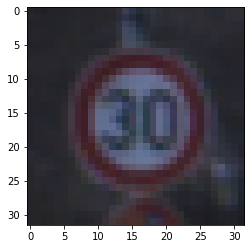

In [11]:
i = 4000
plt.imshow(X_train[i])
y_train[i]

# Data Normalization

In [12]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [13]:
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation / 3, axis = 3, keepdims = True)

In [14]:
X_train_gray.shape

(34799, 32, 32, 1)

In [15]:
X_test_gray.shape

(12630, 32, 32, 1)

In [16]:
X_validation.shape

(4410, 32, 32, 3)

In [17]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

In [18]:
X_train_gray_norm

array([[[[-0.11979167],
         [-0.11458333],
         [-0.20572917],
         ...,
         [-0.10677083],
         [-0.06770833],
         [-0.10416667]],

        [[-0.1484375 ],
         [-0.1796875 ],
         [-0.23697917],
         ...,
         [-0.12239583],
         [-0.078125  ],
         [-0.140625  ]],

        [[-0.1640625 ],
         [-0.22135417],
         [-0.296875  ],
         ...,
         [-0.20833333],
         [-0.11458333],
         [-0.09114583]],

        ...,

        [[-0.13541667],
         [-0.125     ],
         [-0.1015625 ],
         ...,
         [ 0.31770833],
         [ 0.3046875 ],
         [ 0.3203125 ]],

        [[ 0.55729167],
         [ 0.59375   ],
         [ 0.60677083],
         ...,
         [ 0.66145833],
         [ 0.6640625 ],
         [ 0.6484375 ]],

        [[ 0.9453125 ],
         [ 0.94791667],
         [ 0.9453125 ],
         ...,
         [ 0.94010417],
         [ 0.94270833],
         [ 0.93489583]]],


       [[[-0.734375  ],


# Model Training

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [20]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6, kernel_size = (5,5), activation = 'relu', input_shape = (32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation = 'relu'))

cnn_model.add(Dense(units = 84, activation = 'relu'))

cnn_model.add(Dense(units = 43, activation = 'softmax'))

In [39]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', 
                  optimizer = Adam(learning_rate = 0.001), 
                  metrics = ['accuracy'])

In [22]:
history = cnn_model.fit(X_train_gray_norm, 
              y_train, 
              batch_size = 500, 
              epochs = 30, 
              verbose = 1, 
              validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/30
70/70 [==============================] - 5s 68ms/step - loss: 3.1898 - accuracy: 0.1673 - val_loss: 2.8308 - val_accuracy: 0.2646
Epoch 2/30
70/70 [==============================] - 5s 68ms/step - loss: 1.8259 - accuracy: 0.4987 - val_loss: 1.5354 - val_accuracy: 0.5585
Epoch 3/30
70/70 [==============================] - 5s 71ms/step - loss: 0.9832 - accuracy: 0.7230 - val_loss: 1.0325 - val_accuracy: 0.6952
Epoch 4/30
70/70 [==============================] - 5s 74ms/step - loss: 0.6640 - accuracy: 0.8176 - val_loss: 0.8147 - val_accuracy: 0.7615
Epoch 5/30
70/70 [==============================] - 6s 87ms/step - loss: 0.5115 - accuracy: 0.8632 - val_loss: 0.7257 - val_accuracy: 0.7875
Epoch 6/30
70/70 [==============================] - 7s 93ms/step - loss: 0.4124 - accuracy: 0.8922 - val_loss: 0.6515 - val_accuracy: 0.8102
Epoch 7/30
70/70 [==============================] - 6s 88ms/step - loss: 0.3418 - accuracy: 0.9140 - val_loss: 0.6285 - val_accuracy: 0.8170
Epoch 8/30
70

# Model Evaluation

In [23]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 4ms/step - loss: 0.9636 - accuracy: 0.8713
Test accuracy: 0.8712589144706726


In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

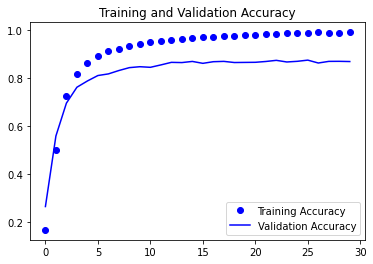

In [26]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

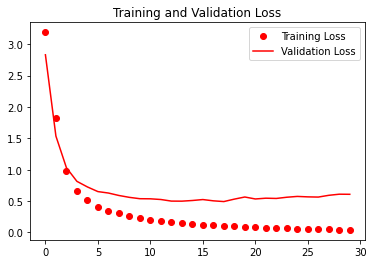

In [27]:
plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [30]:
predicted_classes = np.argmax(cnn_model.predict(X_test_gray_norm), axis = -1)
y_true = y_test

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)

<AxesSubplot:>

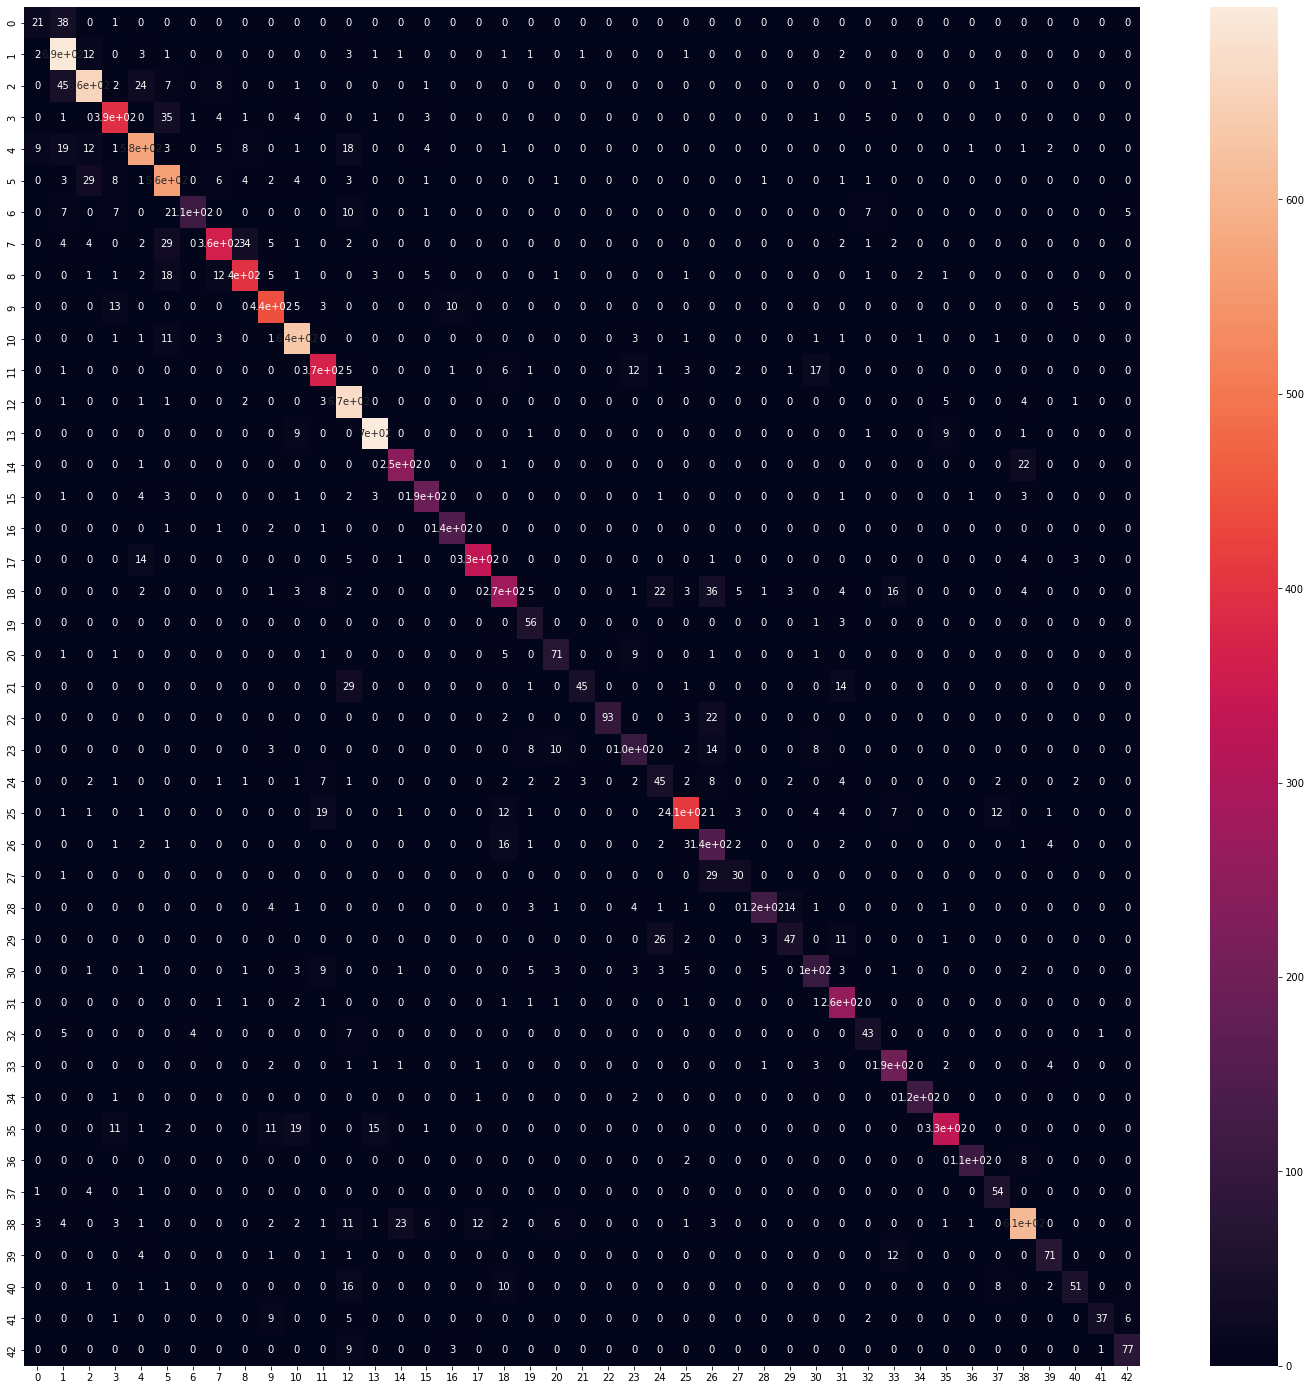

In [33]:
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)

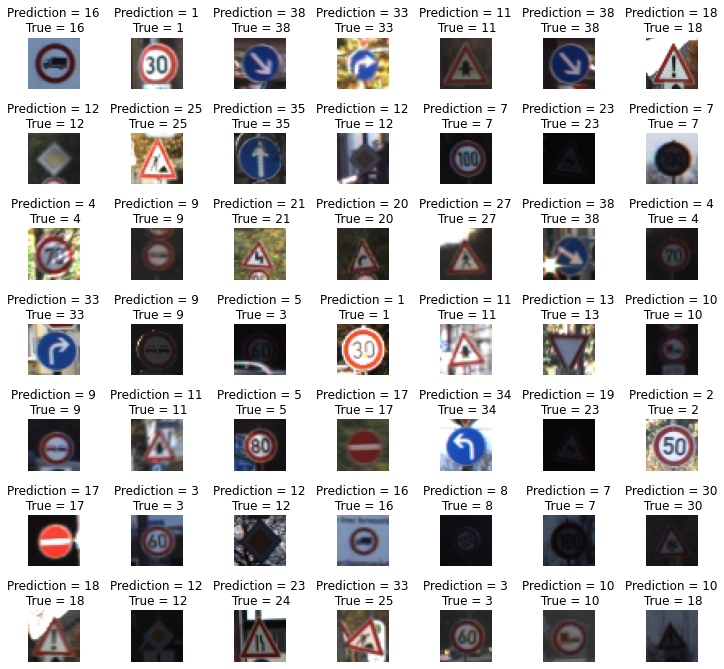

In [38]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)